In [4]:
import os
os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks/mecab")

In [5]:
# mecab download 
# --영구적인 설치가 아닙니다. 새로운 노트를 사용할 때마다 새로 설치해야 합니다.
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.


In [7]:
cd Mecab-ko-for-Google-Colab/

/content/drive/My Drive/Colab Notebooks/mecab/Mecab-ko-for-Google-Colab


In [8]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 2.0MB/s 
     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 3.8MB 35.2MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-08-30 05:00:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.2, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?S

In [10]:
from collections import Counter
from string import punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [14]:
pd.read_csv('../reversed_data_after_preprocessing.csv')['title']

0                   서해상으로 북상 중인 태풍  바비  피해 줄이려면 
1            새벽 4시 5시 사이 서울 근접  이 시각 서울시 재난안전상황실
2                코로나 때문에 봉사시간 못 채워    졸업 막힌 대학생들
3             성인 남자가 서 있기 힘들 정도    태풍  바비  군산 도착
4               위험 반원  인천 초비상 초속 25m 넘으면 영종대교 통제
                          ...                   
9370              깜깜이 감염  확진자 확산하는 원주시 다중이용시설 폐쇄
9371                    원주 코로나19 확진 잇달아 5명 추가 확진
9372              경기 어제 신규확진 109명 코로나사태 이후 일일 최다
9373    방역당국 사랑제일교회 밤샘대치    21일 명단확보 재시도 위해 대기 중
9374               사랑제일교회  밤샘 대치 속  교인 명단 제출  거부
Name: title, Length: 9375, dtype: object

In [22]:
title = []

with open('../reversed_data_after_preprocessing.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)
    for row in reader:
        title.append(row[0])

In [24]:
title_str = ' '.join(title)

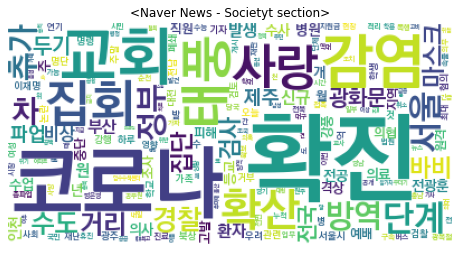

In [32]:
# 단어
from konlpy.tag import Mecab


def count_word_freq(data):
        
    mecab = Mecab()
    data = mecab.nouns(data)
    stopwords = ['명', '일', '시', '분', '초', '만', '대', '번', '전', '후', '등', '중', '곳', '년', '월']
    data = [noun for noun in data if noun not in stopwords]
    counter = Counter(data)
    return counter

def create_wordcloud(data):
    counter = count_word_freq(data)
    
    wc = WordCloud(font_path="/content/drive/My Drive/Colab Notebooks/mecab/KoPubWorld Dotum Bold.ttf", 
                   background_color='white')
    
    plt.figure(figsize=(8, 12))
    plt.imshow(wc.generate_from_frequencies(counter))
    plt.axis('off')
    
    return None


#--------
create_wordcloud(title_str)
plt.title("<Naver News - Societyt section>");

In [33]:
# mecab = Mecab()
# data = mecab.nouns(title_str)

In [34]:
# import nltk
# from nltk import FreqDist
# vocab = FreqDist(data)

In [36]:
# vocab.most_common()